In [4]:
package System {
     
    
    import ISQ::*;
    import ScalarValues::*;
    item def Image;
    item def Scene;
    item def Picture;
    item def cameraReady;
    item def Data;
    item def ProcessdPicture;
    item def Pic;
    item def Processdata;
    item def Information;

   
}


Package System (f5790126-7262-4ce1-a8e5-1cd69ecb0143)


In [11]:
package HAPsystemAction {
     
    import System::*;
   

    
    action def Focus{ in scene : Scene; out image : Image; }
    action def Shoot{ in image : Image; out picture : Picture; }
    action def MonitorData {
      in item scene : Scene;
      out item picture : Picture;
     
    action focus : Focus { in scene; out image; }
         bind focus.scene = scene;
   
      flow focus.image to shoot.image;
      first focus then shoot;
    action shoot : Shoot { in image; out picture; }
      bind shoot.picture = picture;
      } 
    
     
     } 

Package HAPsystemAction (6facb187-280c-415e-ade5-d715d032a1eb)


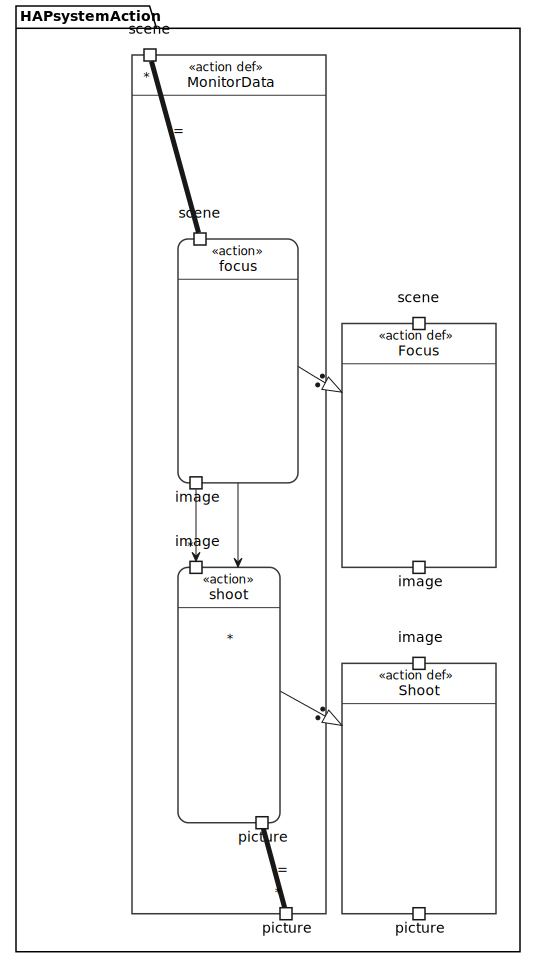

In [12]:
%viz HAPsystemAction 

In [13]:
package HAPsystemActionDataProcessingTransmit {
     
    import System::*;
    
    // Define the activity 'CaptureImage'
  
     
   
        action def Process{
            
            in picture : Picture;
            out processdpicture: ProcessdPicture;
        }
        action def Transmit{
            in processdpicture : ProcessdPicture;
            out data : Data;
        }
        action def DataProcessTransmit { 
        in picture : Picture;
           out data : Data;
       
  
          action process: Process { in picture; out processdpicture; }
           bind process.picture = picture;
              
flow from process.processdpicture to transmit.processdpicture;
          action transmit: Transmit { in processdpicture; out data; }

            bind transmit.data = data;
             
   
        } 

       
    
}


Package HAPsystemActionDataProcessingTransmit (da926181-96e8-47b8-ba3f-c895ba06e55c)


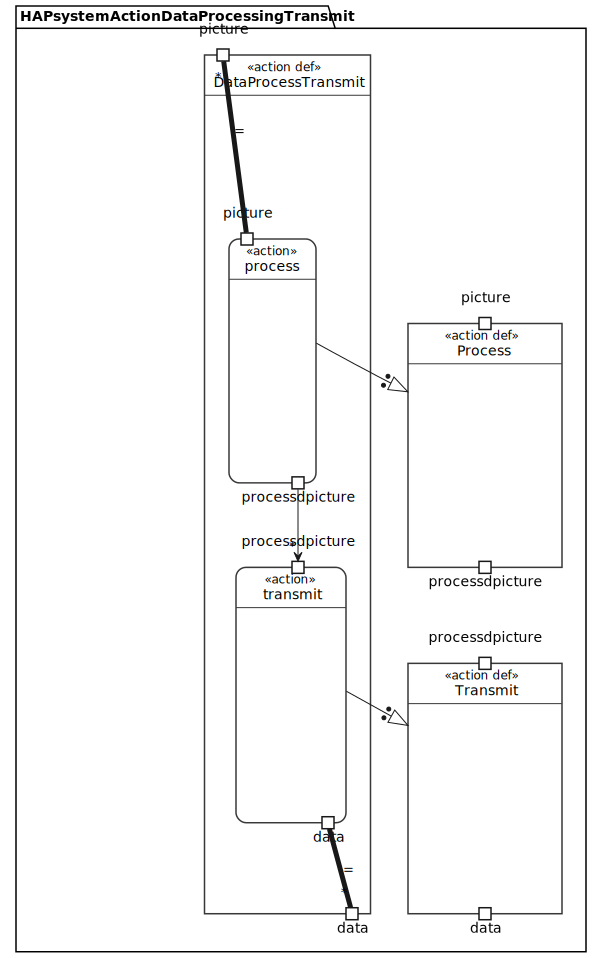

In [14]:
%viz HAPsystemActionDataProcessingTransmit

In [15]:
package HAPsystemReceive {
     
    import System::*;
    
    // Define the activity 'CaptureImage'
 
   
       
        action def Receive{
            in data : Data;
            out processdata: Processdata;
        }
       action def Processinfo{
            
            in processdata: Processdata;
            out information: Information;
        }
        action def Reception { 
         in data : Data;
           out information: Information;
       
          bind receive.data = data;
          action receive: Receive { in data; out processdata; }
          
              
      flow from receive.processdata to processinfo.processdata;
          action processinfo: Processinfo { in processdata; out information; }
         
            bind processinfo.information = information;
             
   
        }
         
        
     
    

       
    
}


Package HAPsystemReceive (21f4e0de-bb00-4e92-be28-f27b9e2a8056)


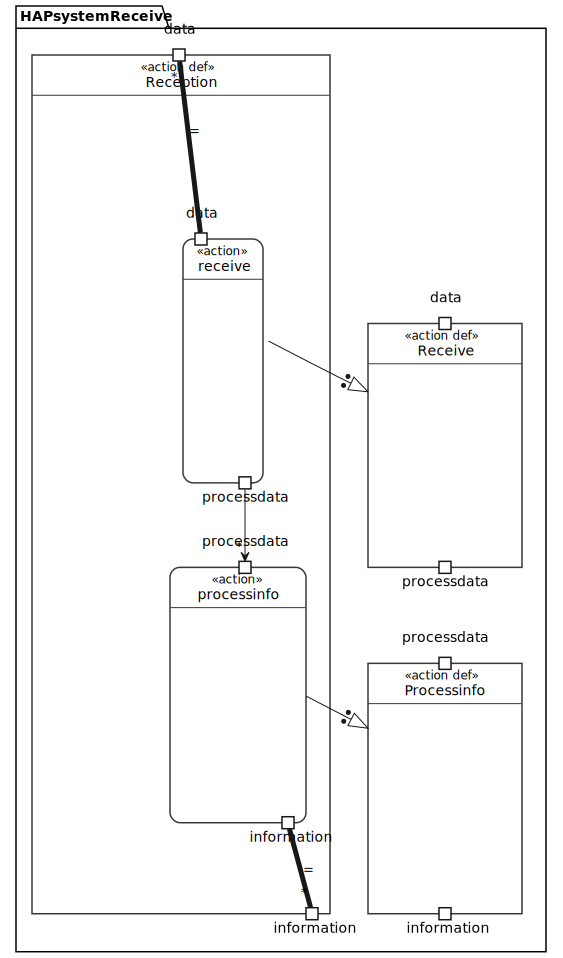

In [16]:
%viz HAPsystemReceive 